# Week02_report

In [283]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.optimize import minimize
from scipy.stats import t, norm
from scipy.stats import ttest_1samp
from scipy.stats import bartlett, levene
from scipy.stats import kurtosistest, skewtest
from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import multivariate_normal
import seaborn as sns

## question 1

In [284]:
### question1a

# read csv file
file1 = '/Users/qianduoduo/fintech545/problem1.csv'
problem1 = pd.read_csv(file1)

# calculate x-mean ^ power from 1 to 4
for column in problem1.columns:
    new_col = f"{column}-mean"
    new_col_sqrt = f"({column}-mean)^2"
    new_col_skew = f"({column}-mean)^3"
    new_col_kurt = f"({column}-mean)^4"
    problem1[new_col] = problem1[column] - problem1[column].mean()
    problem1[new_col_sqrt]= (problem1[column] - problem1[column].mean()) ** 2
    problem1[new_col_skew] = (problem1[column] - problem1[column].mean()) ** 3
    problem1[new_col_kurt] = (problem1[column] - problem1[column].mean()) ** 4
print(problem1)
problem1.describe()

# mean
x_sum = problem1['x'].sum()
print("mean_x is", x_sum / 1000)

# variance
var = 1 / 999 * 5421.793461
print("var_x is", var)

# skewness
skew_x = (problem1['x'] - problem1['x'].mean()) ** 3
skew_x_sum = skew_x.sum()
# print("skew_x_sum is", skew_x_sum)
sim_corrected_x = (problem1['x'] - problem1['x'].mean()) ** 2
sim_corrected_x_sum = sim_corrected_x.sum()
cm2_x =  sim_corrected_x_sum / 1000
# print("sigma^2 of x is", cm2_x)
cm_x = np.sqrt(cm2_x)
# print("sigma of x is", cm_x)
# skewness_x = skew_x_sum / 1000 / np.sqrt(cm2_x ** 3)
cube_x = skew_x / (cm_x ** 3)
cube_x_sum = cube_x.sum()
skewness_x = cube_x_sum / 1000
print("skewness of x is", skewness_x)

# kurtosis
kurt_x = (problem1['x'] - problem1['x'].mean()) ** 4
kurt_x_sum = kurt_x.sum()
# print("kurt_x_sum is", kurt_x_sum)
kurtosis_x = kurt_x_sum / 1000 / (cm2_x **2)
print("kurtosis_x is", kurtosis_x)
ex_kurtosis_x = kurtosis_x - 3
print("ex_kurtosis_x is", ex_kurtosis_x)


### question1b
# pandas outcomes
data = problem1['x'].values

m = np.mean(data)
s2 = np.var(data)
sk = skew(data)
k = kurtosis(data, fisher = False)

# outcomes
print("pandas mean is", m)
print("pandas variance is", s2)
print("pandas skewness is", sk)
print("pandas kurtosis is", k)


### question1c
# mean
# h_0:true mean = 1.0489703904839585  h_1: true mean != 1.0489703904839585
data_x = problem1['x']
true_mean = 1.0489703904839585
# one sample t test
t_statistic, p_value = ttest_1samp(data_x, true_mean)
print("\nt-statistic for mean is", t_statistic)
print("p-value for mean is", p_value)
# compare with p-value
alpha = 0.05 #significant level at 5%
if p_value < alpha:
    print("reject the null：sample mean does not equal to the true mean")
else:
    print("do not reject the null：sample mean equals to the true mean")
    
    
# variance
# chi-square test
degrees_of_freedom = len(data_x) - 1
# Calculate the chi-square statistic
chi_square_statistic = len(data_x) * (s2 / 5.427220681681682)
# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_square_statistic, degrees_of_freedom)
print("\np-value for variance is", p_value)
alpha = 0.05
if p_value < alpha:
    print("reject the null hypothesis: The sample variance is not equal to the true variance value.")
else:
    print("do not reject the null hypothesis: The sample variance equals the true variance value.")


# kurtosis test
kurtosis_statistic, kurtosis_p_value = kurtosistest(data_x)
print("\nkurtosis test statistic is", kurtosis_statistic)
print("p-value is", kurtosis_p_value.round(6))
alpha = 0.05 #significant level is 5%
if p_value < alpha:
    print("reject the null：the sample kurtosis does not equal to the true kurtosis")
else:
    print("do not reject the null：the sample kurtosis equals to the true kurtosis")

# skewness test
skewness_statistic, skewness_p_value = skewtest(data_x)
print("\nskewness test statistic is", skewness_statistic)
print("p-value is", skewness_p_value)
alpha = 0.05 #significant level is 5%
if p_value < alpha:
    print("reject the null：the sample skewness does not equal to the true skewness")
else:
    print("do not reject the null：the sample skewness equals to the true skewness")

            x    x-mean  (x-mean)^2  (x-mean)^3  (x-mean)^4
0    0.922177 -0.126794    0.016077   -0.002038    0.000258
1    1.791781  0.742810    0.551767    0.409858    0.304447
2    0.397551 -0.651419    0.424347   -0.276428    0.180071
3    3.564269  2.515298    6.326725   15.913600   40.027451
4   -0.691414 -1.740385    3.028938   -5.271517    9.174467
..        ...       ...         ...         ...         ...
995 -2.913057 -3.962027   15.697660  -62.194556  246.416523
996  2.845173  1.796203    3.226344    5.795168   10.409296
997  1.663335  0.614365    0.377444    0.231888    0.142464
998  2.344441  1.295470    1.678243    2.174114    2.816499
999  1.164175  0.115204    0.013272    0.001529    0.000176

[1000 rows x 5 columns]
mean_x is 1.0489703904839585
var_x is 5.427220681681682
skewness of x is 0.8806086425277363
kurtosis_x is 26.122200789989733
ex_kurtosis_x is 23.122200789989733
pandas mean is 1.0489703904839585
pandas variance is 5.421793461199845
pandas skewness is 0.88

## question 2

In [285]:
### question2a
# read csv file
file2 = '/Users/qianduoduo/fintech545/problem2.csv'
data2 = pd.read_csv(file2)

# the dependent variable is y and the independent variable is x
y = data2['y']
X = sm.add_constant(data2['x'])  # add the intercept term

# OLS model, beta, stdandard deviation of OLS errors
ols_model = sm.OLS(y, X).fit()
ols_beta = ols_model.params[1] 
ols_std_error = np.std(ols_model.resid) 
print(ols_model.summary()) # print the model results

# MLE under normality
mle_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()
print(mle_model.summary()) # print the model results
# MLE beta, stdandard deviation of MLE errors
mle_beta = mle_model.params[1]  # Beta from MLE
mle_std_error = np.std(mle_model.resid_pearson)

# results
print("OLS Beta is", ols_beta)
print("OLS Standard Deviation of Residuals is", ols_std_error)
print("\nMLE Beta is", mle_beta)
print("MLE Standard Deviation of Residuals is", mle_std_error)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.6
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           5.59e-20
Time:                        21:56:29   Log-Likelihood:                -284.54
No. Observations:                 200   AIC:                             573.1
Df Residuals:                     198   BIC:                             579.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.071     -1.222      0.2

In [286]:
### question2b

y = data2['y']
x = data2['x']

# log likelihood function - t distribution 
def likelihood_t(parameters, y, x):
    intercept, beta, df, sigma = parameters
    prediction = intercept + beta * x
    e = y - prediction
    log_likelihood_t = np.sum(t.logpdf(e, df=df, scale=sigma))
    return -log_likelihood_t

initial_parameters = [0, 1, 10, 1]

result = minimize(likelihood_t, initial_parameters, args=(y, x))
log_likelihood_t = -result.fun  # Correct way to get the log-likelihood

intercept_hat, beta_hat, df_hat, sigma_hat = result.x

print("Estimated Parameters - t distribution:")
print("log_likelihood_t is", -log_likelihood_t)
print("mle_beta:", beta_hat.round(4))
print("mle_intercept:", intercept_hat.round(4))
print("df:", df_hat.round(4))
print("sigma:", sigma_hat.round(4))


# log likelihood function - under normality assumption
def likelihood(parameters, y, x):
    intercept, beta, sigma = parameters
    prediction = intercept + beta * x
    e = y - prediction
    log_likelihood_n = np.sum(norm.logpdf(e, scale=sigma))
    return -log_likelihood_n

initial_parameters = [np.mean(y), np.cov(x, y)[0, 1] / np.var(x), 1]
result = minimize(likelihood, initial_parameters, args=(y, x), method='L-BFGS-B')

intercept_hat, beta_hat, sigma_hat = result.x
print("\nEstimated Parameters - under normality:")
print("log_likelihood_n is", -log_likelihood_n)
print("mle_beta:", beta_hat.round(4))
print("mle_intercept:", intercept_hat.round(4))
print("sigma:", sigma_hat.round(4))

# AIC
# AIC = 2 * #ofParameters - 2 * log_likelihood
aic_t = 2 * 4 - 2 * log_likelihood_t
print("\nAIC for t-distribution model:", round(aic_t, 4))

log_likelihood_n = -result.fun
num_params_n = len(result.x)
aic_n = 2 * 3 - 2 * log_likelihood_n
print("AIC for normal distribution model:", round(aic_n, 4))

Estimated Parameters - t distribution:
log_likelihood_t is 281.2934031796488
mle_beta: 0.675
mle_intercept: -0.0973
df: 7.1598
sigma: 0.8551

Estimated Parameters - under normality:
log_likelihood_n is 284.53756305442874
mle_beta: 0.7753
mle_intercept: -0.0874
sigma: 1.0038

AIC for t-distribution model: 570.5868
AIC for normal distribution model: 575.0751


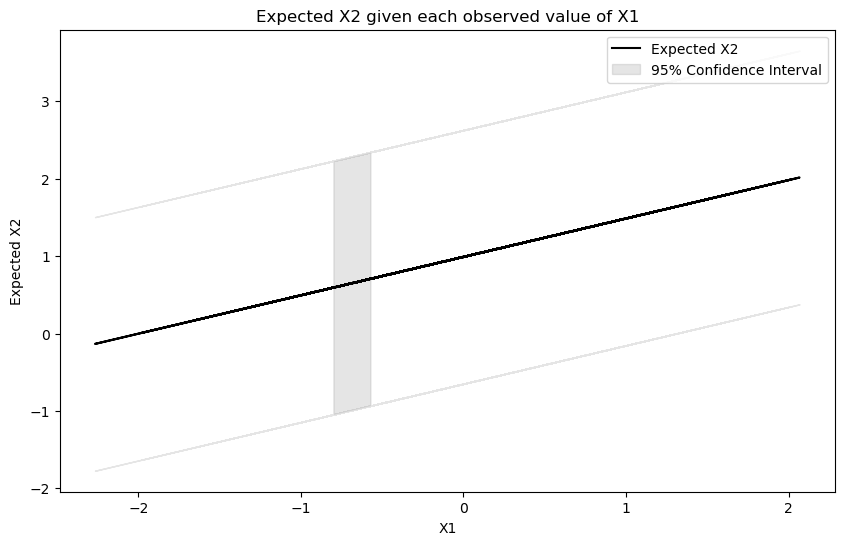

In [287]:
### question2c
# read csv file
data2c = pd.read_csv('/Users/qianduoduo/fintech545/problem2_x.csv')
x1 = data2c['x1']
x2 = data2c['x2']
# calculate mean and covariance matrix for x1 and x2
x1_mean = x1.mean()
x2_mean = x2.mean()
cov_xx = data2c[['x1', 'x2']].cov()
cov_x1x1 = cov_xx.loc['x1', 'x1']
cov_x2x2 = cov_xx.loc['x2', 'x2']
cov_x1x2 = cov_xx.loc['x1', 'x2']

# read csv file
data_x1 = pd.read_csv('/Users/qianduoduo/fintech545/problem2_x1.csv')
x1_obs = data_x1['x1']

# fit the multivariate normal distribution
multivariate_n = multivariate_normal(mean=[x1_mean, x2_mean], cov=cov_xx)

# calculate conditional distribution of X2 given observed X1
conditional_means = []
confidence_intervals = []

for x1_observed in x1_obs:
    # calculate conditional mean and variance for X2
    conditional_mean = x2_mean + cov_x1x2 / cov_x1x1 * (x1_observed - x1_mean)
    conditional_variance = cov_x2x2 - cov_x1x2 / cov_x1x1 * cov_x1x2
    
    #calculate 95% confidence interval
    z_score = 1.96  # for 95% confidence interval
    margin_of_error = z_score * np.sqrt(conditional_variance)
    
    conditional_means.append(conditional_mean)
    confidence_intervals.append((conditional_mean - margin_of_error, conditional_mean + margin_of_error))

# plot the expected X2 given each observed value of X1 with 95% confidence interval
plt.figure(figsize=(10, 6))
plt.plot(x1_obs, conditional_means, label='Expected X2', color='black')
plt.fill_between(x1_obs, [interval[0] for interval in confidence_intervals], [interval[1] for interval in confidence_intervals], color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('X1')
plt.ylabel('Expected X2')
plt.legend()
plt.title('Expected X2 given each observed value of X1')
plt.show()


## question 3

In [288]:
# read csv file
file3 = '/Users/qianduoduo/fintech545/problem3.csv'
problem3 = pd.read_csv(file3)

# AR(1) p = 1
ar1_mdl = sm.tsa.ARIMA(problem3['x'], order=(1, 0, 0))  
ar1_results = ar1_mdl.fit()
print(ar1_results.summary())

# AR(2) p = 2
ar2_mdl = sm.tsa.ARIMA(problem3['x'], order=(2, 0, 0))  
ar2_results = ar2_mdl.fit()
print(ar2_results.summary())

# AR(3) p = 3
ar3_mdl = sm.tsa.ARIMA(problem3['x'], order=(3, 0, 0))  
ar3_results = ar3_mdl.fit()
print(ar3_results.summary())

# MA(1) q = 1
ma1_mdl = sm.tsa.ARIMA(problem3['x'], order=(0, 0, 1))  
ma1_results = ma1_mdl.fit()
print(ma1_results.summary())

# MA(2) q = 2
ma2_mdl = sm.tsa.ARIMA(problem3['x'], order=(0, 0, 2))  
ma2_results = ma2_mdl.fit()
print(ma2_results.summary())

# MA(3) q = 3
ma3_mdl = sm.tsa.ARIMA(problem3['x'], order=(0, 0, 3))  
ma3_results = ma3_mdl.fit()
print(ma3_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -819.328
Date:                Fri, 26 Jan 2024   AIC                           1644.656
Time:                        21:56:37   BIC                           1657.299
Sample:                             0   HQIC                          1649.617
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1258      0.070     30.473      0.000       1.989       2.263
ar.L1          0.2019      0.045      4.512      0.000       0.114       0.290
sigma2         1.5517      0.105     14.743      0.0